### `Aim`: Implement SGD from scratch and compare the parameters of the model to sklearns implementaion of `SGD Classifier`

## Installations

In [1]:
!pip install -qr ../requirements.txt

## Imports

In [2]:
import numpy as np
import pandas as pd
import math
from tqdm import tqdm
from math import log10
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import linear_model

## Create custom dataset

In [3]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [4]:
X.shape, y.shape

((50000, 15), (50000,))

<font color='green'>Splitting data into train and test </font>

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [6]:
# Standardizing the data.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

## SKlearn SGD classifer

In [8]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [9]:
clf.fit(X=X_train, y=y_train) # fitting our model

-- Epoch 1
Norm: 0.70, NNZs: 15, Bias: -0.501317, T: 37500, Avg. loss: 0.552526
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.04, NNZs: 15, Bias: -0.752393, T: 75000, Avg. loss: 0.448021
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.26, NNZs: 15, Bias: -0.902742, T: 112500, Avg. loss: 0.415724
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.43, NNZs: 15, Bias: -1.003816, T: 150000, Avg. loss: 0.400895
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.55, NNZs: 15, Bias: -1.076296, T: 187500, Avg. loss: 0.392879
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 1.65, NNZs: 15, Bias: -1.131077, T: 225000, Avg. loss: 0.388094
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 1.73, NNZs: 15, Bias: -1.171791, T: 262500, Avg. loss: 0.385077
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 1.80, NNZs: 15, Bias: -1.203840, T: 300000, Avg. loss: 0.383074
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 1.86, NNZs: 15, Bias: -1.229563, T: 337500, Avg. loss: 0.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [10]:
clf.coef_, clf.coef_.shape, clf.intercept_
#clf.coef_ will return the weights
#clf.coef_.shape will return the shape of weights
#clf.intercept_ will return the intercept term

(array([[-0.89007184,  0.63162363, -0.07594145,  0.63107107, -0.38434375,
          0.93235243, -0.89573521, -0.07340522,  0.40591417,  0.4199991 ,
          0.24722143,  0.05046199, -0.08877987,  0.54081652,  0.06643888]]),
 (1, 15),
 array([-1.30580538]))

## Custom implementation of Stochastic Gradient for Logistic Regression with L2 regularisation


## Flow:

* Initialize the weight_vector and intercept term to zeros

* Here we create a loss function

 $log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$
- for each epoch:

    - for each batch of data points in train: (keeping batch size=1)

        - We calculate the gradient of loss function w.r.t each weight in weight vector

        $dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)})$ <br>

        - We calculate the gradient of the intercept (write your code in <font color='blue'> 

           $ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t}))$

        - Update weights and intercept: <br>
        $w^{(t+1)}← w^{(t)}+α(dw^{(t)}) $<br>

        $b^{(t+1)}←b^{(t)}+α(db^{(t)}) $


In [11]:
def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias'''
    x = np.arange(len(dim))
    w = np.zeros_like(x, dtype='float')
    b=0

    return w,b

In [12]:
dim=X_train[0] 
w,b = initialize_weights(dim)
print('w =',(w))
print('b =',str(b))

w = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b = 0


<font color='blue'>Compute sigmoid </font>

$sigmoid(z)= 1/(1+exp(-z))$

In [13]:
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and return
    sigmoid_value = 1/(1+np.exp(-z))
    return sigmoid_value

<font color='blue'> Compute loss </font>

$log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$

In [14]:
def logloss(y_true,y_pred):
    '''In this function, we will compute log loss '''
    loss= -(np.sum(np.add(np.multiply(y_true,np.log10(y_pred)),np.multiply(np.subtract(1.0, y_true),np.log10(np.subtract(1.0, y_pred)))))/len(y_true))
    return loss

<font color='blue'>Compute gradient w.r.to  'w' </font>

$dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)}$ <br>

In [15]:
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''

    z = sigmoid(np.dot(w,x)+ b)
    first_term = np.multiply(x, np.subtract(y,z))
    second_term = np.multiply(-alpha/N, w)
    dw = np.subtract(first_term, second_term)
    return dw

<font color='blue'>Compute gradient w.r.to 'b' </font>

$ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t})$

In [16]:
def gradient_db(x,y,w,b):
    '''In this function, we will compute gradient w.r.to b '''
    z = sigmoid(np.dot(w,x)+ b)
    db = np.subtract(y, z)
    return db

<font color='blue'> Implementing logistic regression</font>

In [17]:
def predict_proba(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        predict.append(sigmoid(z))
    return np.array(predict)

In [18]:
def train(X_train,y_train,X_test,y_test,epochs,alpha,eta0):
    ''' In this function, we will implement logistic regression'''
    #Here eta0 is learning rate
    # for every epoch
        # for every data point(X_train,y_train)
           #compute gradient w.r.to w (call the gradient_dw() function)
           #compute gradient w.r.to b (call the gradient_db() function)
           #update w, b
        # predict the output of x_train[for all data points in X_train] using w,b
        #compute the loss between predicted and actual values (call the loss function)
        # store all the train loss values in a list
        # predict the output of x_test[for all data points in X_test] using w,b
        #compute the loss between predicted and actual values (call the loss function)
    
    training_loss = []
    test_loss = []
    
    w, b = initialize_weights(X_train[0])
    num_training_points = len(X_train)

    for epoch in tqdm(range(epochs)):
        for i in range(len(X_train)):
            x = X_train[i]
            y = y_train[i]
            dw = gradient_dw(x, y, w, b, alpha,num_training_points)
            db = gradient_db(x, y, w, b)

            w = np.add(w, np.multiply(eta0,dw))
            b = b + eta0*db
      
        ytrain_proba = predict_proba(w,b,X_train)
        ytest_proba = predict_proba(w,b,X_test)   
        training_loss.append(logloss(y_train, ytrain_proba))
        test_loss.append(logloss(y_test, ytest_proba))

    return w,b, training_loss, test_loss

In [19]:
alpha=0.0001
eta0=0.0001
N=len(X_train)
epochs=50
w,b, training_loss, test_loss=train(X_train,y_train,X_test,y_test,epochs,alpha,eta0)

100%|██████████| 50/50 [00:40<00:00,  1.24it/s]


In [20]:
w,b

(array([-0.97125473,  0.6951595 , -0.1064887 ,  0.6815906 , -0.44472558,
         1.00799643, -0.94341149, -0.07316672,  0.44633499,  0.4781481 ,
         0.27402302,  0.0601363 , -0.09610537,  0.57042948,  0.06404647]),
 -1.369139997316933)

Aim is make that the weights of the classifer and our custom model are as close as possible i.e difference should be in terms of 10^-3

In [21]:
# these are the results we got after we implemented sgd and found the optimal weights and intercept
w-clf.coef_, b-clf.intercept_

(array([[-0.08118289,  0.06353587, -0.03054725,  0.05051953, -0.06038183,
          0.075644  , -0.04767628,  0.0002385 ,  0.04042082,  0.058149  ,
          0.02680159,  0.00967431, -0.0073255 ,  0.02961295, -0.00239241]]),
 array([-0.06333462]))

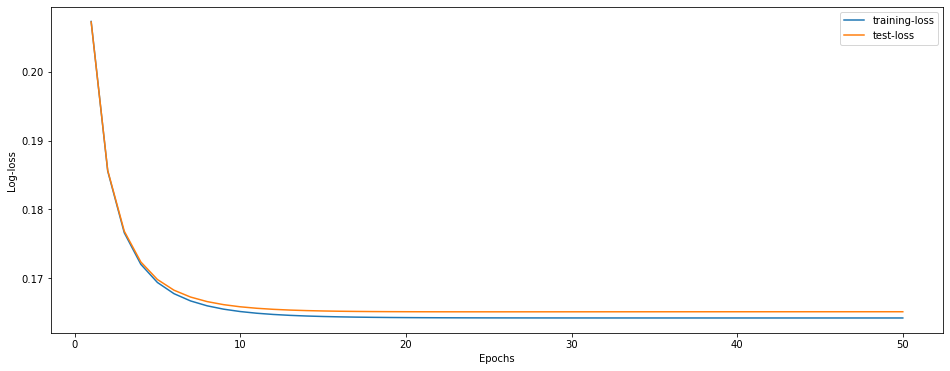

In [22]:
epochs = [i for i in range(1,51)]
plt.figure(figsize=(16,6))
plt.plot(epochs, training_loss, label="training-loss")
plt.plot(epochs, test_loss, label="test-loss")
plt.xlabel("Epochs")
plt.ylabel("Log-loss")
plt.legend(loc="best")

In [23]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        if sigmoid(z) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)
print(1-np.sum(y_train - pred(w,b,X_train))/len(X_train))
print(1-np.sum(y_test  - pred(w,b,X_test))/len(X_test))

0.9518666666666666
0.94936
